In [21]:
import os
from herbie import Herbie
from paint.standard2 import cm_tmp
from toolbox import EasyMap, pc
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import imageio
from datetime import datetime, timedelta
# Define the initialization date
init_date = datetime.strptime("2023-10-12 18", "%Y-%m-%d %H")

In [22]:
# Data Checker - Lists available data for the current date and hourly run you choose

available_fxx = []

# Loop through potential forecast hours
for fxx in range(48):  # Assuming potential forecast hours from 0 to 47
    try:
        H_temp = Herbie(
            init_date.strftime("%Y-%m-%d %H"),
            model="hrrr",
            product="prs",
            fxx=fxx
        )
        
        # Attempt to retrieve the data
        ds = H_temp.xarray("TCDC:entire atmosphere")
        
        # Check if valid_time has duplicates and deduplicate if necessary
        if 'valid_time' in ds.coords and ds['valid_time'].size > 1:
            _, index = np.unique(ds['valid_time'], return_index=True)
            ds = ds.isel(valid_time=index)
        
        # If successful, add the current fxx to the list
        available_fxx.append(fxx)
    except:
        # If there's an error (likely data not found), break out of the loop
        break

fxx_range = available_fxx
print(ds)


✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2023-Oct-12 18:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

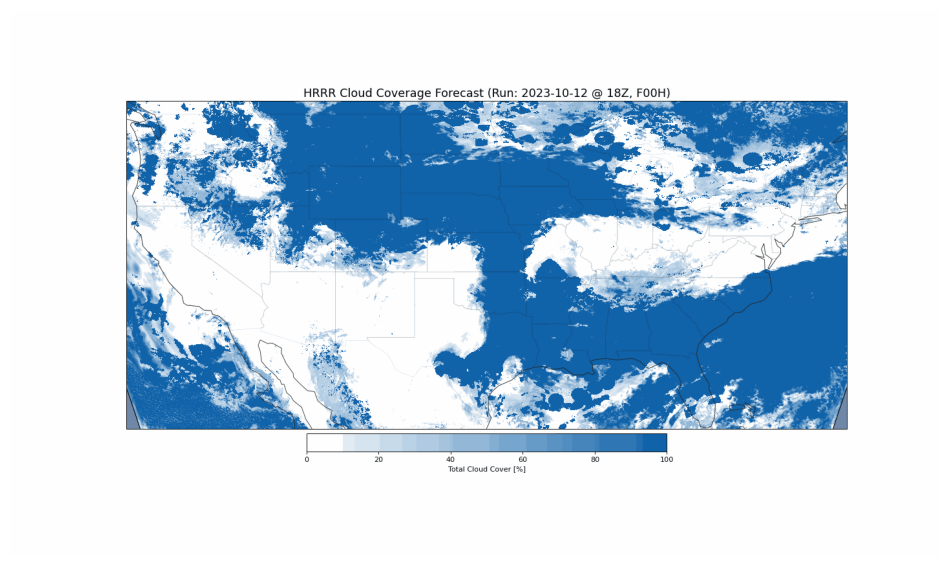

In [23]:
# Create a custom colormap where white is no clouds and dark gray is full clouds
cmap_custom = LinearSegmentedColormap.from_list('custom', ['#FFFFFF', '#1062A9'], N=256)

# Choose the correct amount of runs - ex: F0-F48
fxx_range = range(0, 48)
frames = []

for fxx in fxx_range:
    H = Herbie(
        init_date.strftime("%Y-%m-%d %H"),
        model="hrrr",
        product="sfc",
        fxx=fxx
    )

    ds = H.xarray("TCDC:entire atmosphere")

     # Check if valid_time has duplicates and deduplicate if necessary
    if 'valid_time' in ds.coords and ds['valid_time'].size > 1:
        _, index = np.unique(ds['valid_time'], return_index=True)
        ds = ds.isel(valid_time=index)

    ax = EasyMap(figsize=(17.99, 10.59)).STATES().OCEAN().LAND().DOMAIN(ds).ax
    ds.tcc.plot(
        x="longitude",
        y="latitude",
        ax=ax,
        transform=pc,
        cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
        cmap=cmap_custom,  # Set the custom colormap
    )

    # Update the extent to focus on the continental US
    ax.set_extent([-125, -70, 25, 50], crs=ccrs.PlateCarree())  # West #East #South #North

    # Compute the valid date
    valid_date = init_date + timedelta(hours=fxx)

    # Set a custom title with the proper date, run, and fxx
    ax.set_title(f"HRRR Cloud Coverage Forecast (Run: {init_date.strftime('%Y-%m-%d @ %H')}Z, F{fxx:02}H)", fontsize=16)

    # Save the current frame as an image
    frame_filename = f"temp_frame_{fxx}.png"
    plt.savefig(frame_filename, dpi=80)
    frames.append(frame_filename)

    plt.close()

# Combine individual frames into a GIF
import imageio.v2 as imageio_v2

with imageio_v2.get_writer('cloud_coverage.gif', mode='I', duration=500, loop=0) as writer:
    for frame_filename in frames:
        image = imageio_v2.imread(frame_filename)
        writer.append_data(image)

# Clean up individual frame files
for frame_filename in frames:
    os.remove(frame_filename)

# Display the generated GIF
plt.figure(figsize=(12, 12))
plt.imshow(imageio_v2.imread('cloud_coverage.gif'))
plt.axis('off')
plt.show()